In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os 
os.getcwd()

'C:\\Users\\Asus\\AI-ML\\Revision'

In [3]:
os.chdir(r'E:\AI-ML PYTHON\job datasets')


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 

In [5]:
data = pd.read_csv('Fraud.csv', encoding='latin-1')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [7]:
data_n = data[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']]

In [8]:
data.shape

(6362620, 11)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [11]:
data.columns 

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [12]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [13]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


## Handling missing valuesc

In [15]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [16]:
data.notna().sum()

step              6362620
type              6362620
amount            6362620
nameOrig          6362620
oldbalanceOrg     6362620
newbalanceOrig    6362620
nameDest          6362620
oldbalanceDest    6362620
newbalanceDest    6362620
isFraud           6362620
isFlaggedFraud    6362620
dtype: int64

## Correlation between features

In [17]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<AxesSubplot:>

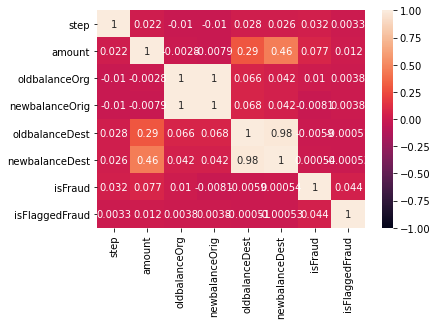

In [18]:
sns.heatmap(data.corr(),annot=True, vmin=-1,vmax=+1)

array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrg'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>],
       [<AxesSubplot:title={'center':'isFraud'}>,
        <AxesSubplot:title={'center':'isFlaggedFraud'}>, <AxesSubplot:>]],
      dtype=object)

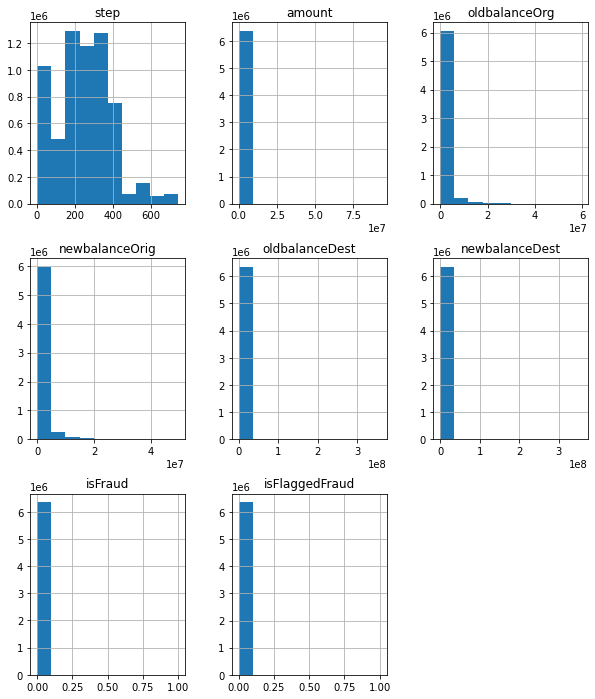

In [19]:
data.hist(figsize=(10,12))

## outliers detection 

<AxesSubplot:>

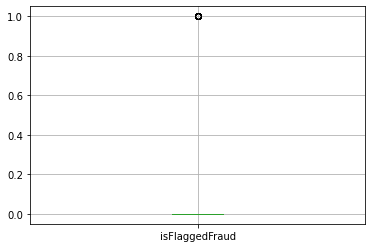

In [20]:
data.boxplot(column='isFlaggedFraud')


<AxesSubplot:>

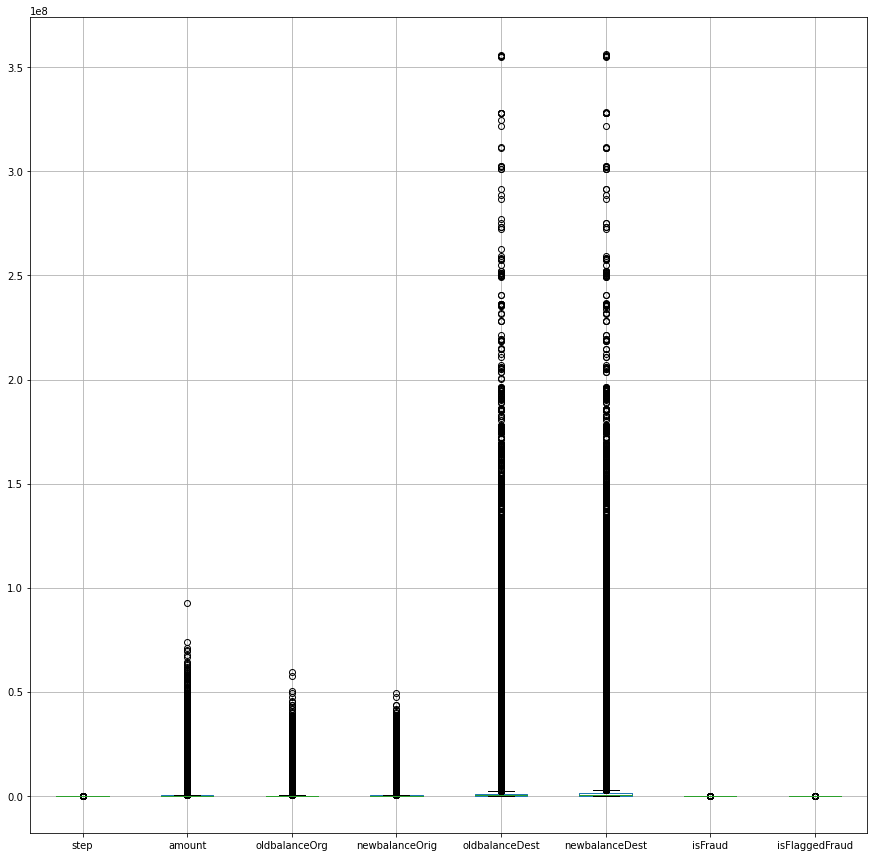

In [21]:
data_n.boxplot(figsize=(15,15))

In [22]:
z = np.abs(stats.zscore(data_n)) 

In [23]:
print(z)

[[1.70304158e+00 2.81559923e-01 2.29810037e-01 ... 3.33411405e-01
  3.59512005e-02 1.58577857e-03]
 [1.70304158e+00 2.94767262e-01 2.81359380e-01 ... 3.33411405e-01
  3.59512005e-02 1.58577857e-03]
 [1.70304158e+00 2.97554804e-01 2.88653782e-01 ... 3.33411405e-01
  2.78154828e+01 1.58577857e-03]
 ...
 [3.51012348e+00 1.01539526e+01 1.89649113e+00 ... 1.40302700e+00
  2.78154828e+01 1.58577857e-03]
 [3.51012348e+00 1.10976490e+00 5.58104668e-03 ... 3.33411405e-01
  2.78154828e+01 1.58577857e-03]
 [3.51012348e+00 1.10976490e+00 5.58104668e-03 ... 1.66981230e+00
  2.78154828e+01 1.58577857e-03]]


In [24]:
threshold = 3
print(np.where(z > 3))

(array([      2,       3,      84, ..., 6362618, 6362619, 6362619],
      dtype=int64), array([6, 6, 5, ..., 6, 0, 6], dtype=int64))


In [25]:
outliers = np.where(z > 3)

In [26]:
data_n.shape 

(6362620, 8)

In [27]:
data_v = data_n.iloc[:,0:7]
data_v.shape 
data_v.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [28]:
target = data_n.iloc[:,-1]
target.shape  
target.head()

0    0
1    0
2    0
3    0
4    0
Name: isFlaggedFraud, dtype: int64

In [29]:
target.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_v,target, random_state = 2, test_size = 0.3)


In [31]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test) 

classifier= LogisticRegression()

# fit the model with data
classifier.fit(X_train,y_train)

#
y_pred=classifier.predict(X_test)


In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy = accuracy_score(y_test,y_pred)*100
print(f'accuracy {accuracy:4.2f}')
print('\n') 
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
print('\n')
report = classification_report(y_test,y_pred)
print(report)


accuracy 100.00


[[1908784       0]
 [      2       0]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1908784
           1       0.00      0.00      0.00         2

    accuracy                           1.00   1908786
   macro avg       0.50      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786



    -  you shouldn't be getting the 100 % aaccuracy

In [36]:
from sklearn.model_selection import KFold, cross_val_score, validation_curve
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=5,random_state=7)

dct = DecisionTreeClassifier(criterion='gini', random_state=0)
dct.fit(X_train, y_train)
y_pred = dct.predict(X_test)


cv_results = cross_val_score(dct, X_train,y_train, cv=kfold)
print (cv_results.mean()*100, "%")



99.99975302170796 %


In [38]:
import pandas as pd
df_predicted=pd.DataFrame()
df_predicted['Actual']=y_test
df_predicted['Predicted']=y_pred
df_predicted.head()


,Actual,Predicted
4801897,0,0
2779475,0,0
784465,0,0
5635648,0,0
301298,0,0


In [39]:
import numpy as np
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))


Total number of mislabelled data points from 1908786 test samples is 2


In [40]:
from sklearn.metrics import accuracy_score
print("Accuracy of test set=",accuracy_score(y_test, y_pred)*100)


Accuracy of test set= 99.99989522136059


In [42]:
from sklearn.metrics import confusion_matrix
cm = (confusion_matrix(y_test,y_pred))
print("The confusion matrix looks like following...\n")
cm


The confusion matrix looks like following...



array([[1908782,       2],
       [      0,       2]], dtype=int64)

## candidate answers for the questions

1. Actually this data doesn't have any missing values but it has outliers so far i tried to remove these outliers but couldn't because it is a skewed data with imbalanced dataset. if i try to remove outliers the model couldn't learn anything from such fraud transactions which are actually the outliers. 



2. This fraud detection model is completely imbalanced dataset because the total fraud transactions are 16 out of 6362604 transactions. so the model couldn't learn  on fraud transactions happened. The normal transactions which are positive one can only profoundly impact on the model. so somehow i used kfold cross validation for this random shuffling purpose.




3. The variables could be selected only numerical datatypes and the correlation between the dependent and independent features which i constructed heatmap for visualization.the important feature selection also could be done by pca but no need of it coz it reduces the dimension.



4. So the best set of tools are gini index for the decision tree classifier i used because it is much faster and dct algorithm is moreover fits for classification with the focusing itself again on important features.



5. 'amount' withdrawn and 'isfraud' variables  which the amount of more than certain given threshold plays key factors for the fraudulent customer.



6. yes, 'amount' withdrawn and 'isfraud' giving the more correlation for the isfraudflagged target variable more than any other variables 



7. They have to deny the withdrawal transaction more than certain threshold value which means should be not allowed unless bank consent or else the more scrutinization power of security regarding the higher amount of transactions which should be implemented as soon as possible for the fraud transactions. In such way infrastructure of company can adoptable.



8. This has got the 99.99 % accuracy on test data that means it had a probability of working to our favour until unless there is not any data leakage.however there will not be any data leakage because we didn't apply handling missing values or feature scaling without splitting the data. we have got nothing in the data to handle missing values and feature scale is done after the train test split data only. so, there is no chance of data leakage

## Note:

Actually i have to submit this before 14/10 but i'm submitting on 15/10 at 1:30 AM which is 1:30 hr delay to the given time.
i'm extremely sorry for the delay submission with 1:30 hr late to the 14th date because i'm haemolytic anaemia patient so from  last 4-5 days i felt sick and feeling not well.
